## Wine Quality Prediction 

#### Busniss Problem :-

We have to predict Quality of wine based on other independent variables.

#### Importing Libraries:

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve
from pandas_profiling import ProfileReport

#### Importing Data:

In [2]:
df = pd.read_csv('C:\\Users\\Hp\\Downloads//winequality_red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Exploratory Data Analysis:

In [4]:
#See top 5 records 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# See how our Quality is classified.
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [6]:
# Check the Duplicates
df.duplicated().sum()

240

In [7]:
# Removing the duplicate rows
df.drop_duplicates(inplace= True)
df.shape

(1359, 12)

In [8]:
# Check the variable names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Check the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Check the basic Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [11]:
# see the statestical information about the numeric Variables.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [12]:
# Cheack the correlation between different variables.
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


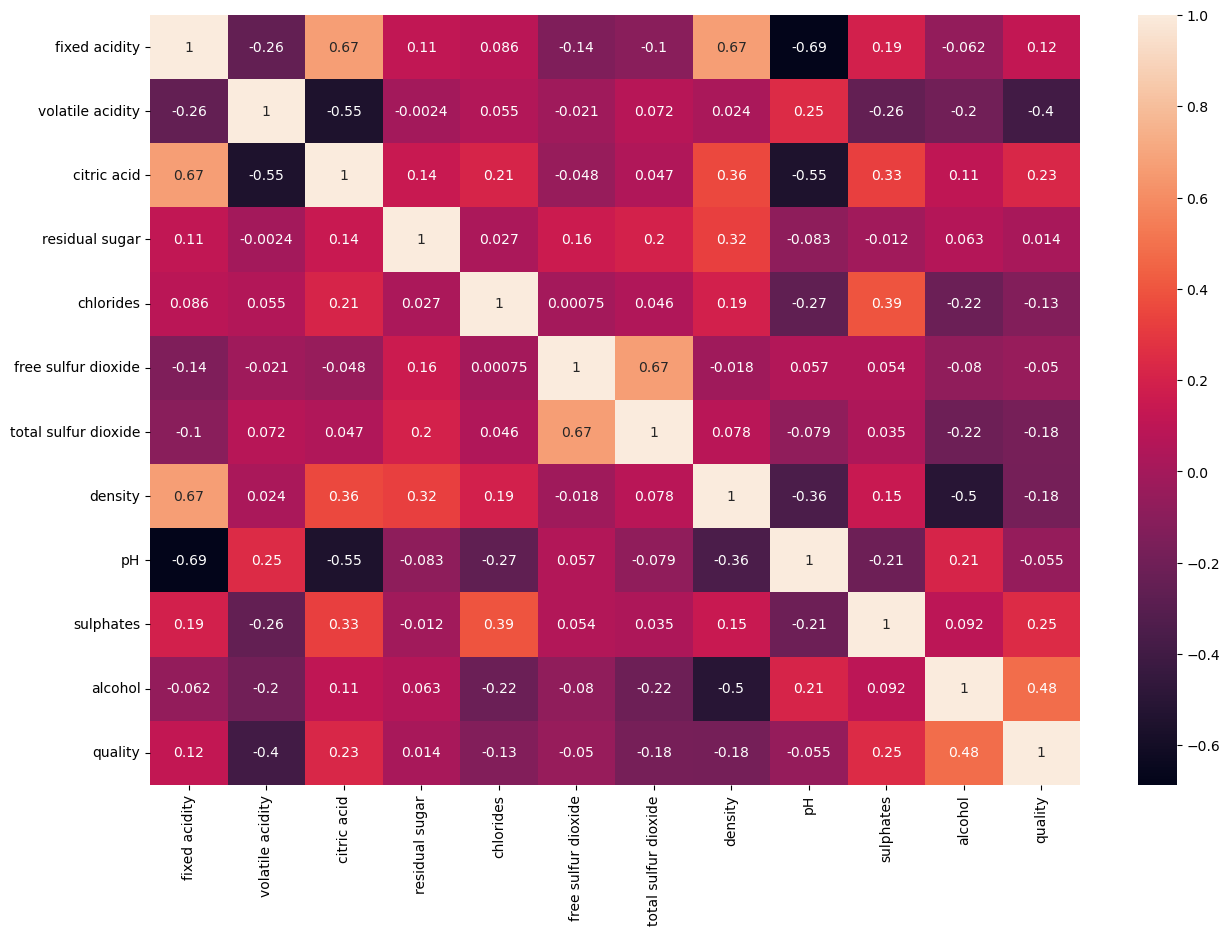

In [13]:
# Finding correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Variance Influation Factor:

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Check the multicolinearity by using VIF
df1 = df.drop(['quality'],axis=1)
vif=pd.DataFrame({'variables':df1.columns})
vif['vif']=[variance_inflation_factor(df1.values,i)
           for i in range(len(df1.columns))]
vif

,variables,vif
0,fixed acidity,75.023032
1,volatile acidity,16.460387
2,citric acid,9.188892
3,residual sugar,4.915733
4,chlorides,6.349793
5,free sulfur dioxide,6.432241
6,total sulfur dioxide,6.543918
7,density,1500.387873
8,pH,1095.732046
9,sulphates,21.946341


#### Deal with Multicollinearity:

In [16]:
# Droping the highly correlated columns.
df.drop(['density','pH'], axis = 1, inplace= True)

In [17]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


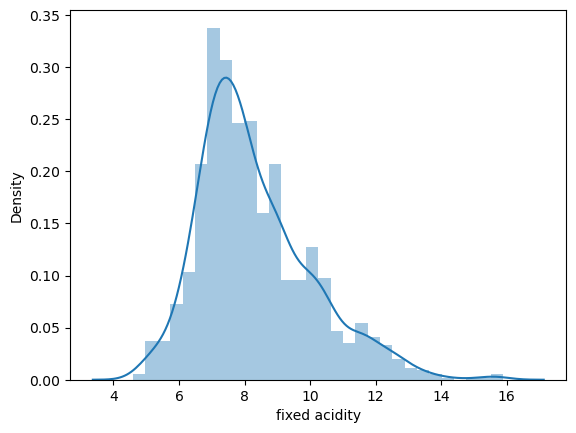

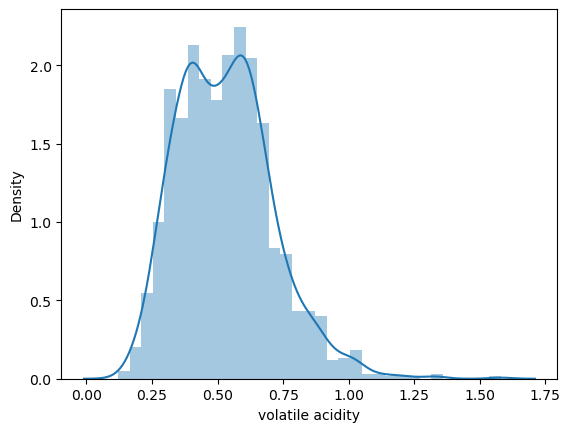

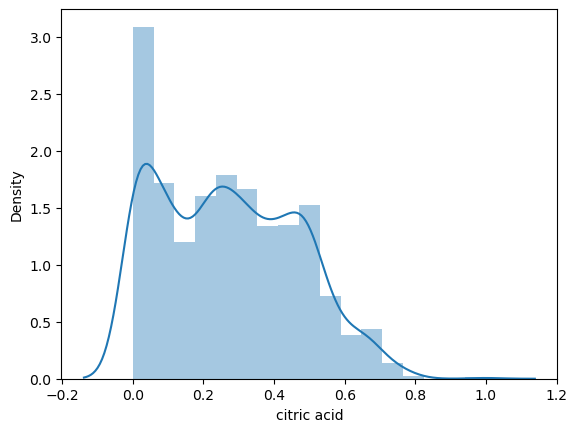

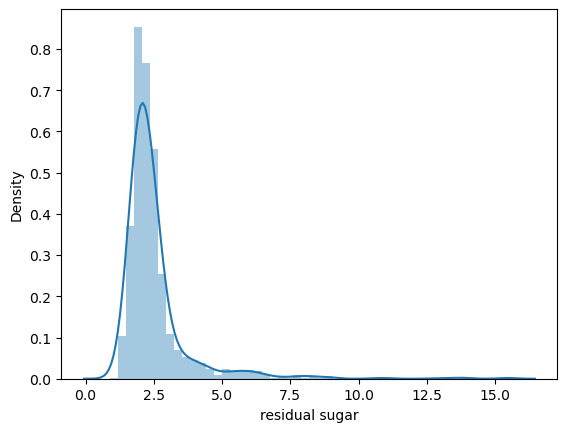

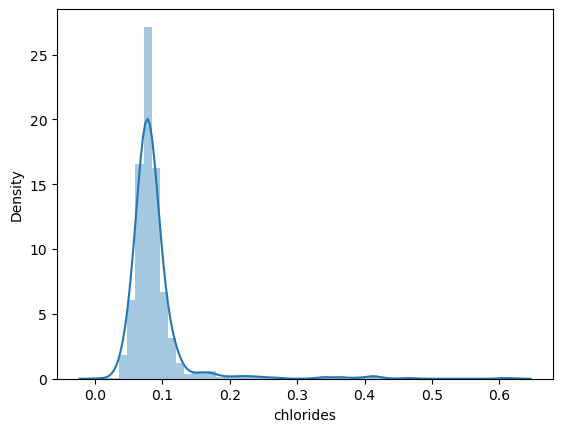

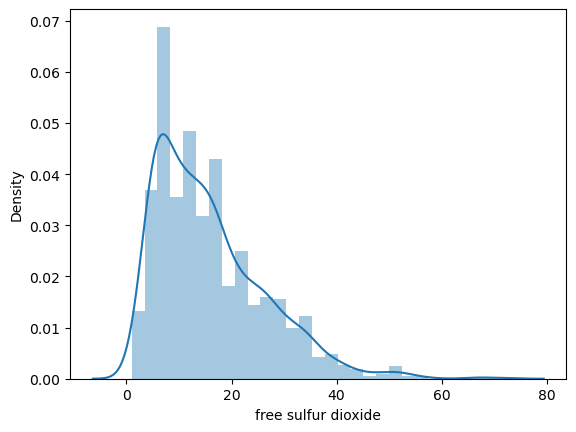

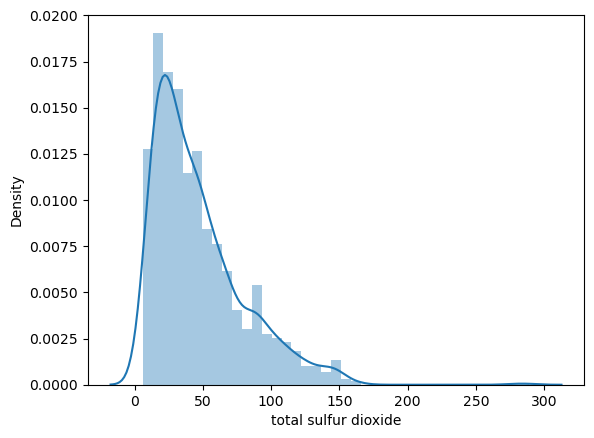

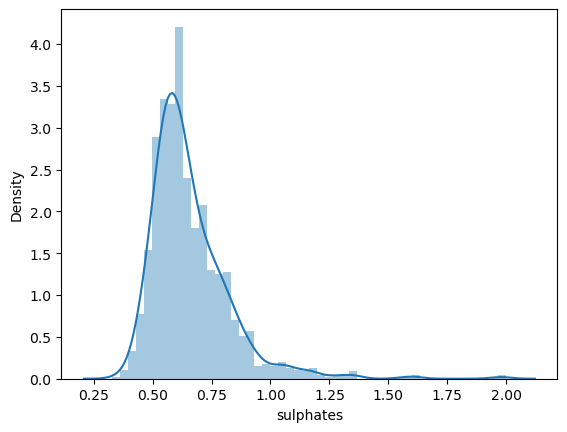

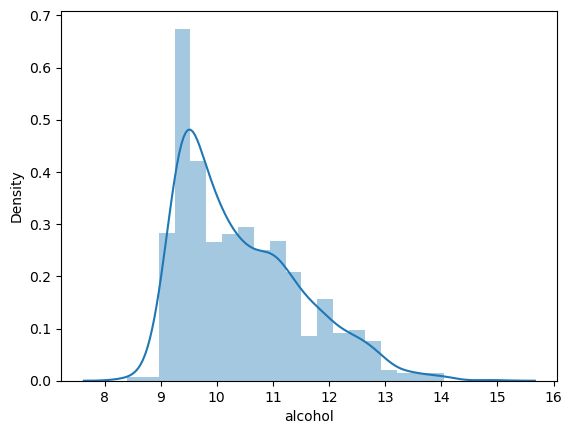

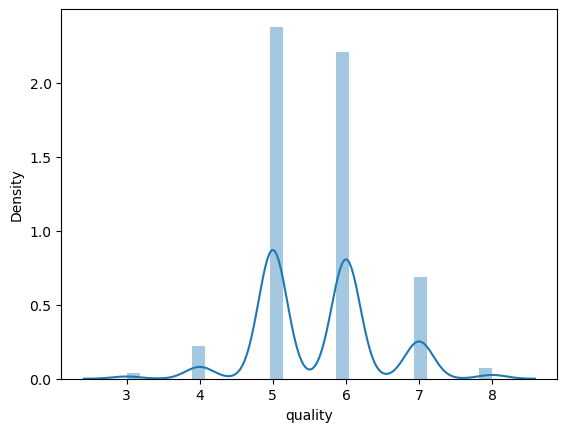

In [18]:
# See the destribution of the data
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

#### Outlier Detection:


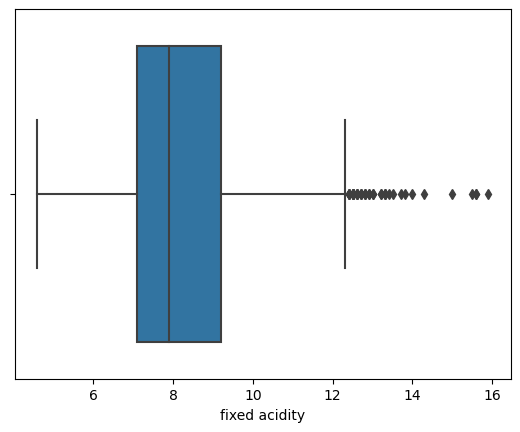

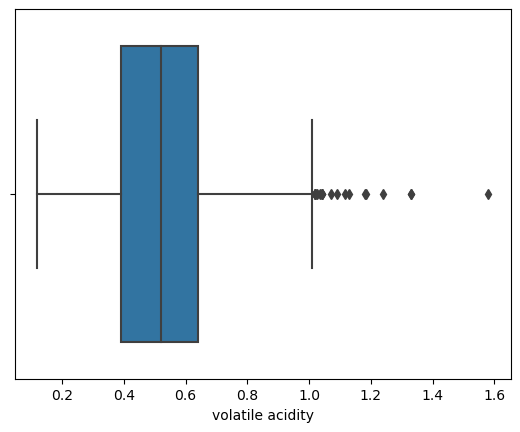

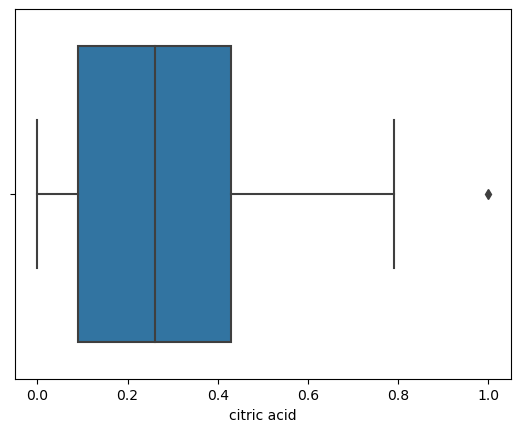

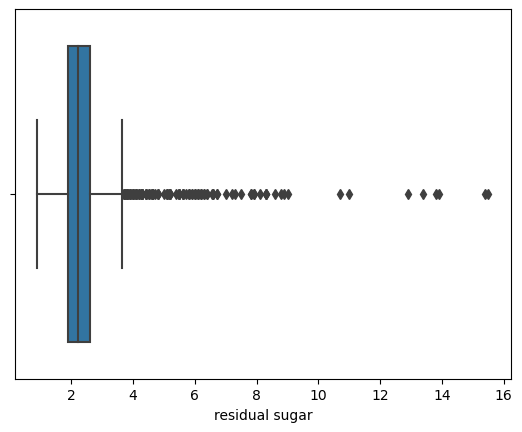

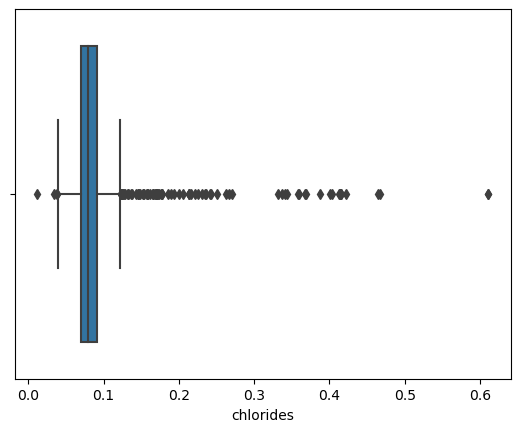

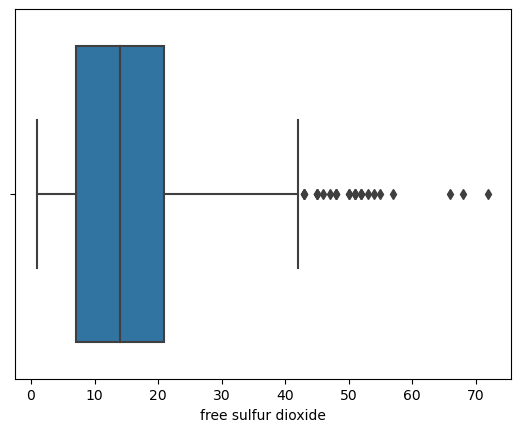

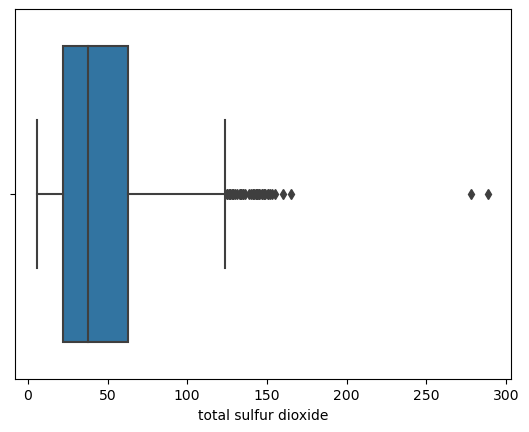

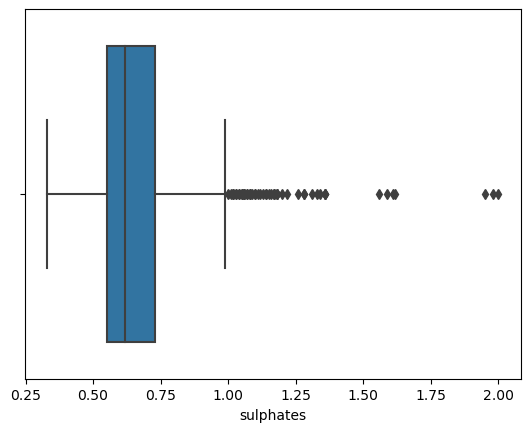

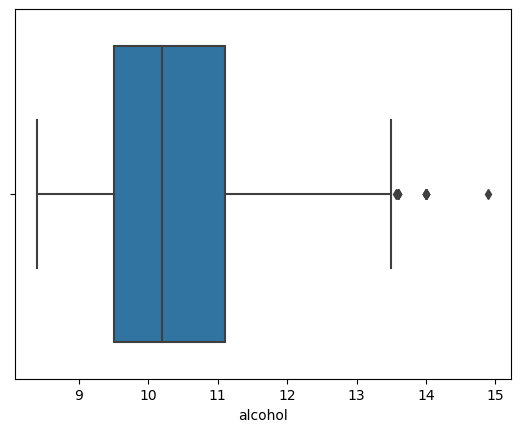

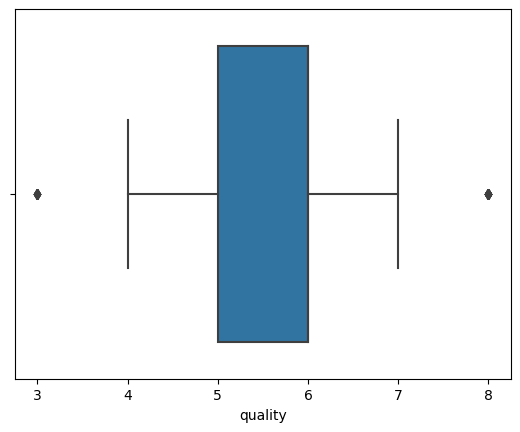

In [19]:
# See the boxplot to detecr the outliers
for i in df.columns:
    sns.boxplot(data=df, x=df[i])
    plt.show()

In [20]:
# Finding lower limit and upper limit of variables
for i in df.columns:
    Q1=np.quantile(df[i],0.25)
    Q2=np.quantile(df[i],0.50)
    Q3=np.quantile(df[i],0.75)
    Q4=np.quantile(df[i],1.0)
    IQR=Q3-Q1
    print("IQR=",IQR)
    Lower_Fence=Q1-(1.5*IQR)
    Upper_Fence=Q3+(1.5*IQR)
    print("Lower_Fence=", i +" = "+ str(Lower_Fence) )
    print("Upper_Fence=", i +" = "+ str(Upper_Fence) )
    print()

IQR= 2.0999999999999996
Lower_Fence= fixed acidity = 3.95
Upper_Fence= fixed acidity = 12.349999999999998

IQR= 0.25
Lower_Fence= volatile acidity = 0.015000000000000013
Upper_Fence= volatile acidity = 1.0150000000000001

IQR= 0.33999999999999997
Lower_Fence= citric acid = -0.42000000000000004
Upper_Fence= citric acid = 0.94

IQR= 0.7000000000000002
Lower_Fence= residual sugar = 0.8499999999999996
Upper_Fence= residual sugar = 3.6500000000000004

IQR= 0.02099999999999999
Lower_Fence= chlorides = 0.03850000000000002
Upper_Fence= chlorides = 0.12249999999999998

IQR= 14.0
Lower_Fence= free sulfur dioxide = -14.0
Upper_Fence= free sulfur dioxide = 42.0

IQR= 41.0
Lower_Fence= total sulfur dioxide = -39.5
Upper_Fence= total sulfur dioxide = 124.5

IQR= 0.17999999999999994
Lower_Fence= sulphates = 0.28000000000000014
Upper_Fence= sulphates = 0.9999999999999999

IQR= 1.5999999999999996
Lower_Fence= alcohol = 7.1000000000000005
Upper_Fence= alcohol = 13.5

IQR= 1.0
Lower_Fence= quality = 3.5


#### Removing the outliers:

In [21]:
for cols in df.columns:
    df[cols]=df[cols].clip(lower=df[cols].quantile(0.05),upper=df[cols].quantile(0.85))

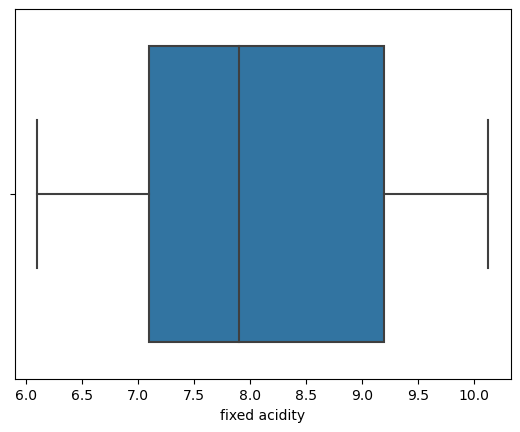

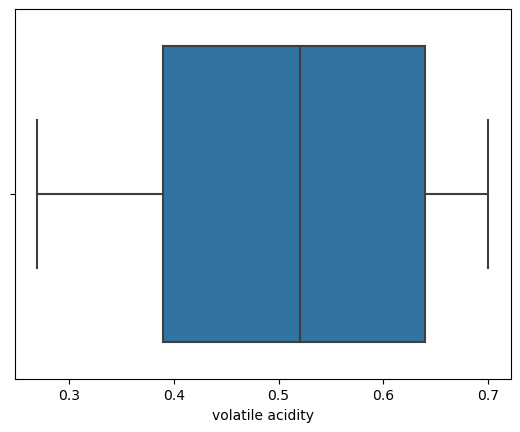

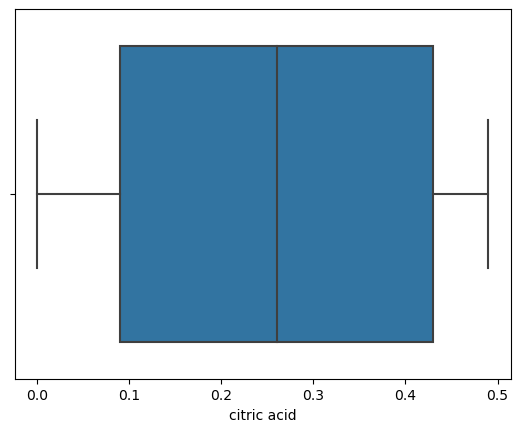

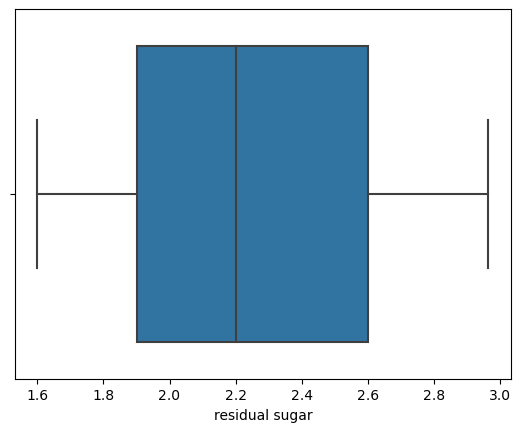

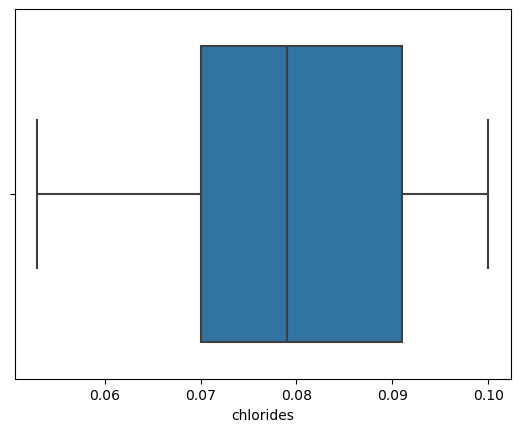

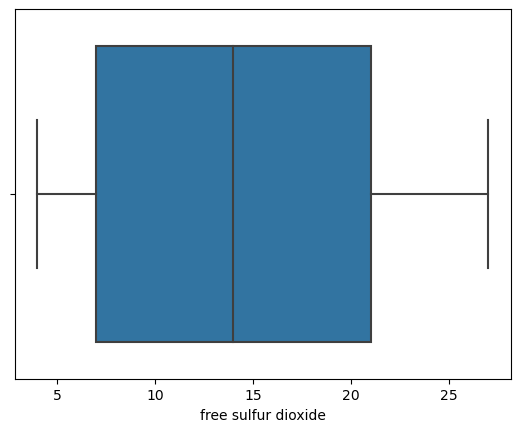

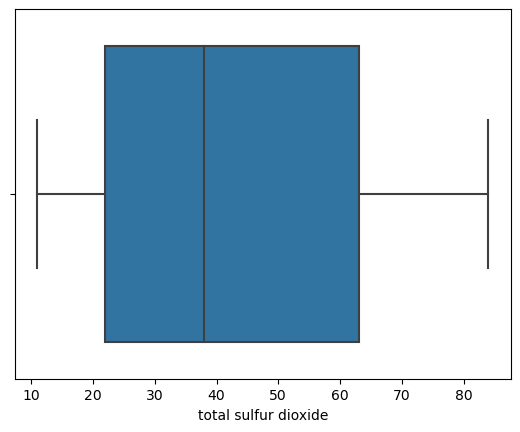

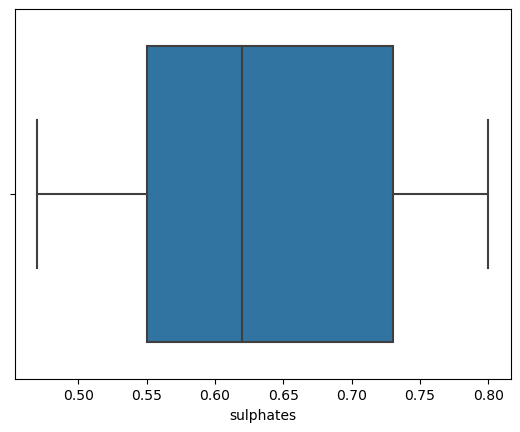

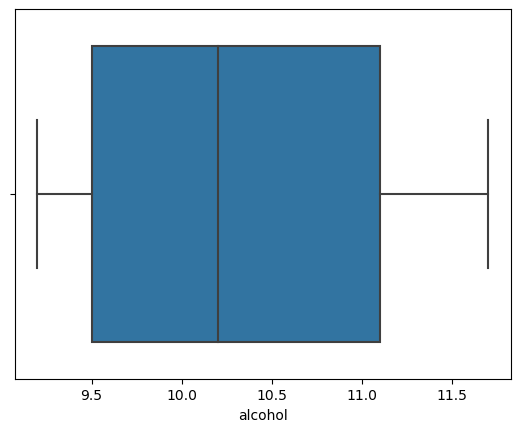

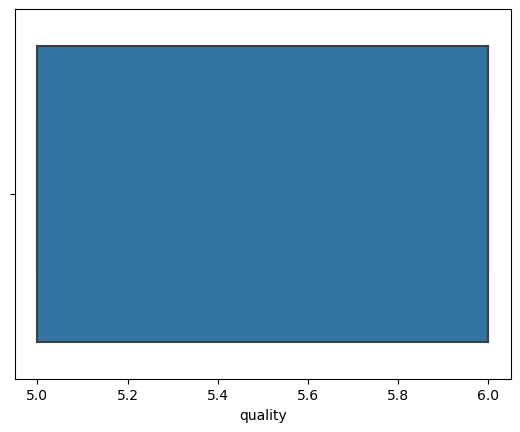

In [22]:
# Check boxplot either outliers remove or not
for i in df.columns:
    sns.boxplot(data=df, x=df[i])
    plt.show()

#### Seprate the independent and dependent variables:

In [23]:
x = df.drop(columns='quality')

In [24]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.40,0.700,0.00,1.900,0.076,11.0,34.0,0.56,9.4
1,7.80,0.700,0.00,2.600,0.098,25.0,67.0,0.68,9.8
2,7.80,0.700,0.04,2.300,0.092,15.0,54.0,0.65,9.8
3,10.13,0.280,0.49,1.900,0.075,17.0,60.0,0.58,9.8
5,7.40,0.660,0.00,1.800,0.075,13.0,40.0,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1593,6.80,0.620,0.08,1.900,0.068,27.0,38.0,0.80,9.5
1594,6.20,0.600,0.08,2.000,0.090,27.0,44.0,0.58,10.5
1595,6.10,0.550,0.10,2.200,0.062,27.0,51.0,0.76,11.2
1597,6.10,0.645,0.12,2.000,0.075,27.0,44.0,0.71,10.2


In [25]:
y = df.quality
y

0       5.0
1       5.0
2       5.0
3       6.0
5       5.0
       ... 
1593    6.0
1594    5.0
1595    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1359, dtype: float64

#### Train Test Split:


In [26]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

### Building Model

#### Logistic Regression:

In [27]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=lg.predict(x_test)
y_pred

array([5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 5., 6., 6., 6., 6., 5., 6.,
       6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6., 5., 6.,
       6., 5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 6., 5., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 5., 6., 5., 6., 6., 5., 5., 6., 6., 6., 5., 5.,
       5., 6., 5., 6., 5., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 6.,
       5., 6., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 6.,
       5., 5., 5., 6., 5., 5., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 5.,
       5., 5., 6., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 6.,
       5., 5., 6., 6., 6., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 6., 5.,
       6., 5., 6., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 5., 5., 6.,
       6., 5., 5., 6., 6., 6., 6., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5.,
       5., 6., 6., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 6., 5., 6., 5., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5.,
       6., 6., 6., 6., 6.

In [29]:
lg.score(x_test,y_test)

0.7529411764705882

In [30]:
lg.score(x_train,y_train)

0.7419038272816487

#### Decision Tree:

In [31]:
dt_model = DecisionTreeClassifier()

In [32]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pre_DT=dt_model.predict(x_test)

In [34]:
dt_model.score(x_test,y_test)

0.6411764705882353

In [35]:
dt_model.score(x_train,y_train)

1.0

Here Model is overfited, so we have to deal with it 
It will be normalise by Post Proning(ccp alpha).

In [36]:
path = dt_model.cost_complexity_pruning_path(x,y)
ccp_alpha = path.ccp_alphas

In [37]:
path

{'ccp_alphas': array([0.        , 0.0003607 , 0.0004773 , 0.00064927, 0.00065408,
        0.00066225, 0.00066225, 0.00066894, 0.00067452, 0.00068678,
        0.00068678, 0.00068985, 0.00069711, 0.00069711, 0.00070384,
        0.00070384, 0.0007121 , 0.00072082, 0.00072357, 0.00073584,
        0.00076309, 0.00080273, 0.00084621, 0.00085863, 0.000883  ,
        0.00091939, 0.00096994, 0.00098111, 0.00098111, 0.00098111,
        0.00098111, 0.00098111, 0.00098111, 0.00098111, 0.00098111,
        0.00098111, 0.00098111, 0.00098111, 0.00105119, 0.00105119,
        0.0010547 , 0.00106066, 0.00108368, 0.00108368, 0.00109885,
        0.00109885, 0.00110375, 0.00110375, 0.00110375, 0.00110375,
        0.0011149 , 0.00112127, 0.00112539, 0.00114463, 0.00115237,
        0.00115631, 0.00116185, 0.00117279, 0.00117427, 0.00117734,
        0.00117734, 0.00117734, 0.00117734, 0.00119478, 0.00120186,
        0.00121196, 0.00122639, 0.00122639, 0.00122639, 0.00122639,
        0.00122639, 0.00124869, 0.

In [38]:
ccp_alpha

array([0.        , 0.0003607 , 0.0004773 , 0.00064927, 0.00065408,
       0.00066225, 0.00066225, 0.00066894, 0.00067452, 0.00068678,
       0.00068678, 0.00068985, 0.00069711, 0.00069711, 0.00070384,
       0.00070384, 0.0007121 , 0.00072082, 0.00072357, 0.00073584,
       0.00076309, 0.00080273, 0.00084621, 0.00085863, 0.000883  ,
       0.00091939, 0.00096994, 0.00098111, 0.00098111, 0.00098111,
       0.00098111, 0.00098111, 0.00098111, 0.00098111, 0.00098111,
       0.00098111, 0.00098111, 0.00098111, 0.00105119, 0.00105119,
       0.0010547 , 0.00106066, 0.00108368, 0.00108368, 0.00109885,
       0.00109885, 0.00110375, 0.00110375, 0.00110375, 0.00110375,
       0.0011149 , 0.00112127, 0.00112539, 0.00114463, 0.00115237,
       0.00115631, 0.00116185, 0.00117279, 0.00117427, 0.00117734,
       0.00117734, 0.00117734, 0.00117734, 0.00119478, 0.00120186,
       0.00121196, 0.00122639, 0.00122639, 0.00122639, 0.00122639,
       0.00122639, 0.00124869, 0.00126097, 0.00126143, 0.00126

In [39]:
dt_modle2 = []
for ccp in ccp_alpha:
    dt_m  = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x,y)
    dt_modle2.append(dt_m)

In [40]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00036070351613787574),
 DecisionTreeClassifier(ccp_alpha=0.0004772984905435241),
 DecisionTreeClassifier(ccp_alpha=0.0006492663290481754),
 DecisionTreeClassifier(ccp_alpha=0.0006540757092633472),
 DecisionTreeClassifier(ccp_alpha=0.0006622516556291393),
 DecisionTreeClassifier(ccp_alpha=0.0006622516556291393),
 DecisionTreeClassifier(ccp_alpha=0.0006689410662920598),
 DecisionTreeClassifier(ccp_alpha=0.0006745155751778269),
 DecisionTreeClassifier(ccp_alpha=0.0006867794947265147),
 DecisionTreeClassifier(ccp_alpha=0.0006867794947265147),
 DecisionTreeClassifier(ccp_alpha=0.0006898454746136866),
 DecisionTreeClassifier(ccp_alpha=0.0006971070059254099),
 DecisionTreeClassifier(ccp_alpha=0.0006971070059254099),
 DecisionTreeClassifier(ccp_alpha=0.0007038423393159934),
 DecisionTreeClassifier(ccp_alpha=0.0007038423393159934),
 DecisionTreeClassifier(ccp_alpha=0.000712098554439934),
 DecisionTreeClassifier(ccp_alpha=0.000720818

Text(0, 0.5, 'score')

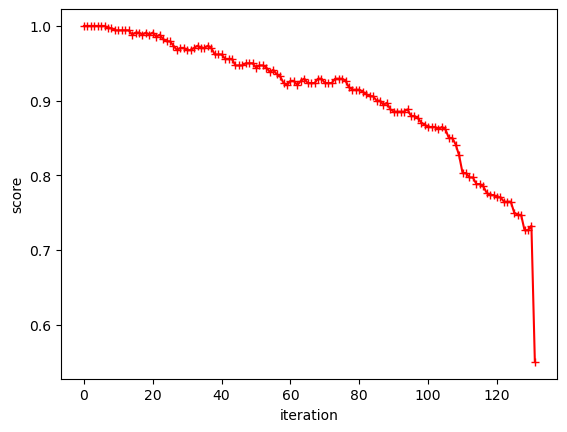

In [41]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha = i)
    dt_m.fit(x,y)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [42]:
dt_modle2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.00036070351613787574),
 DecisionTreeClassifier(ccp_alpha=0.0004772984905435241),
 DecisionTreeClassifier(ccp_alpha=0.0006492663290481754),
 DecisionTreeClassifier(ccp_alpha=0.0006540757092633472),
 DecisionTreeClassifier(ccp_alpha=0.0006622516556291393),
 DecisionTreeClassifier(ccp_alpha=0.0006622516556291393),
 DecisionTreeClassifier(ccp_alpha=0.0006689410662920598),
 DecisionTreeClassifier(ccp_alpha=0.0006745155751778269),
 DecisionTreeClassifier(ccp_alpha=0.0006867794947265147),
 DecisionTreeClassifier(ccp_alpha=0.0006867794947265147),
 DecisionTreeClassifier(ccp_alpha=0.0006898454746136866),
 DecisionTreeClassifier(ccp_alpha=0.0006971070059254099),
 DecisionTreeClassifier(ccp_alpha=0.0006971070059254099),
 DecisionTreeClassifier(ccp_alpha=0.0007038423393159934),
 DecisionTreeClassifier(ccp_alpha=0.0007038423393159934),
 DecisionTreeClassifier(ccp_alpha=0.000712098554439934),
 DecisionTreeClassifier(ccp_alpha=0.000720818

In [43]:
train_score = [i.score(x,y) for i in dt_modle2]

In [44]:
test_score = [i.score(x_test ,y_test) for i in dt_modle2]

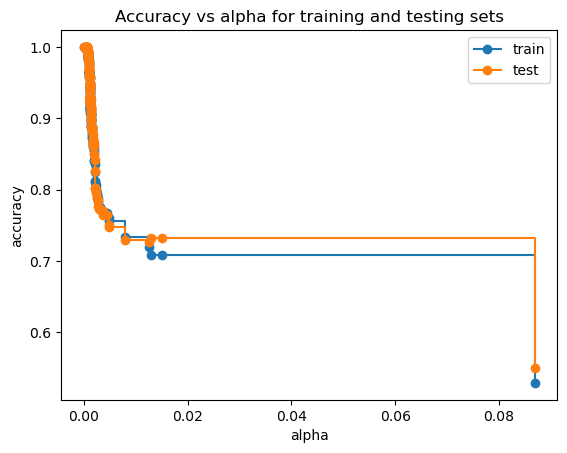

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [46]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.014)
dt_model_ccp.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

In [47]:
dt_model_ccp.score(x_train,y_train)

0.7006869479882237

In [48]:
dt_model_ccp.score(x_test,y_test)

0.7323529411764705

Here we deal with ovefitting now the model is not overfited.

#### Random Forest:

In [52]:
from sklearn.ensemble import RandomForestClassifier
n_list = [45,50,60,65,70,75,150,200,300,350]
for n in n_list:
    ran_r = RandomForestClassifier(n_estimators=n,random_state=0)
    ran_r.fit(x_train,y_train)
    print('n_estimators = ',n,' --> accurecy is = '+str(ran_r.score(x_test,y_test)))

n_estimators =  45  --> accurecy is = 0.7529411764705882
n_estimators =  50  --> accurecy is = 0.7558823529411764
n_estimators =  60  --> accurecy is = 0.7470588235294118
n_estimators =  65  --> accurecy is = 0.7441176470588236
n_estimators =  70  --> accurecy is = 0.75
n_estimators =  75  --> accurecy is = 0.7470588235294118
n_estimators =  150  --> accurecy is = 0.7529411764705882
n_estimators =  200  --> accurecy is = 0.7441176470588236
n_estimators =  300  --> accurecy is = 0.7529411764705882
n_estimators =  350  --> accurecy is = 0.75


In [53]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [54]:
y_pre_ran = ran.predict(x_test)
y_pre_ran

array([5., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6.,
       6., 6., 5., 5., 6., 6., 6., 5., 6., 5., 6., 5., 5., 5., 6., 5., 6.,
       6., 5., 5., 5., 5., 5., 6., 6., 5., 6., 5., 6., 5., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 5.,
       5., 6., 5., 6., 5., 6., 6., 6., 6., 5., 6., 5., 6., 6., 5., 6., 5.,
       5., 6., 5., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 6.,
       5., 5., 5., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 5., 6., 6., 5.,
       6., 5., 6., 6., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6.,
       5., 5., 6., 6., 5., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 6., 5.,
       6., 5., 5., 5., 5., 5., 5., 6., 6., 5., 6., 5., 5., 6., 6., 6., 6.,
       6., 5., 5., 6., 6., 6., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 5.,
       5., 6., 6., 6., 5., 5., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6., 5.,
       6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5.,
       5., 6., 6., 6., 6.

In [55]:
ran.score(x_test,y_test)

0.7558823529411764

In [56]:
ran.score(x_train,y_train)

1.0

In [49]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=lg,random_state=7)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), random_state=7)

In [50]:
y_pred_bag = bag.predict(x_test)

In [51]:
accuracy_score(y_test, y_pred_bag)

0.7382352941176471

In [57]:
bag.score(x_train, y_train)

0.7428851815505397

#### Conclusion:

Here we can conclude that logistic Regre